# Representación Numerica con 32 Bits

## IEEE 754 de 32 bits, también llamado precisión simple o float, representa números reales utilizando:

- 1 bit de signo: 0 para positivo, 1 para negativo.

- 8 bits de exponente: con un sesgo (bias) de 127.

- 23 bits de mantisa: representan la fracción significativa del número.

In [3]:
def decimal_a_ieee754_32(numero):
    # 1. Signo
    signo = '0' if numero >= 0 else '1'
    numero = abs(numero)

    # 2. Parte entera y fraccionaria
    entero = int(numero)
    fraccion = numero - entero

    # 3. Binario de la parte entera
    bin_entero = bin(entero)[2:] if entero != 0 else '0'

    # 4. Binario de la parte fraccionaria
    bin_fraccion = ''
    while len(bin_fraccion) < 30 and fraccion != 0:
        fraccion *= 2
        bit = int(fraccion)
        bin_fraccion += str(bit)
        fraccion -= bit

    # 5. Unir las partes
    if entero != 0:
        bin_total = bin_entero + '.' + bin_fraccion
        exponente = len(bin_entero) - 1
        mantisa = bin_entero[1:] + bin_fraccion
    else:
        # número menor que 1, buscar el primer 1
        primer_uno = bin_fraccion.find('1') + 1
        exponente = -primer_uno
        mantisa = bin_fraccion[primer_uno:]

    # 6. Exponente con  127
    exponente_con_bias = exponente + 127
    bin_exponente = f'{exponente_con_bias:08b}'

    # 7. Mantisa ajustada (23 bits)
    mantisa = (mantisa + '0'*23)[:23]

    # 8. Unión final
    resultado = signo + bin_exponente + mantisa
    return resultado

In [9]:
def ieee754_32_a_decimal(bin_str):
    # Separar las partes
    signo = int(bin_str[0])
    exponente = int(bin_str[1:9], 2) - 127  # quitar bias
    mantisa_bin = bin_str[9:]

    # reconstruir mantisa como 1.xxxxxx
    mantisa = 1.0
    for i in range(len(mantisa_bin)):
        bit = int(mantisa_bin[i])
        mantisa += bit * 2 ** -(i + 1)

    # calcular valor final
    valor = mantisa * (2 ** exponente)
    if signo == 1:
        valor = -valor
    return valor

In [7]:
num = 6.75
binario = decimal_a_ieee754_32(num)
reconstruido = ieee754_32_a_decimal(binario)

print("Número original:", num)
print("IEEE 754 (32 bits):", binario)
print("Convertido de vuelta a decimal:", reconstruido)

Número original: 6.75
IEEE 754 (32 bits): 01000000110110000000000000000000
Convertido de vuelta a decimal: 6.75


# Representación Numerica con 64 Bits

## IEEE 754 de 64 bits, conocido como doble precisión o double, representa números reales con más exactitud. Usa:

1 bit de signo

11 bits de exponente, con sesgo de 1023

52 bits de mantisa

Esto permite representar números con mayor precisión que el formato de 32 bits.

In [7]:
def decimal_a_ieee754_64(numero):
    # 1. Signo
    signo = '0' if numero >= 0 else '1'
    numero = abs(numero)

    # 2. Parte entera y fraccionaria
    entero = int(numero)
    fraccion = numero - entero

    # 3. Parte entera a binario
    bin_entero = bin(entero)[2:] if entero != 0 else '0'

    # 4. Parte fraccionaria a binario
    bin_fraccion = ''
    while len(bin_fraccion) < 60 and fraccion != 0:
        fraccion *= 2
        bit = int(fraccion)
        bin_fraccion += str(bit)
        fraccion -= bit

    # 5. Normalizar
    if entero != 0:
        exponente = len(bin_entero) - 1
        mantisa = bin_entero[1:] + bin_fraccion
    else:
        primer_uno = bin_fraccion.find('1') + 1
        exponente = -primer_uno
        mantisa = bin_fraccion[primer_uno:]

    # 6. Exponente con  (1023)
    exponente_bias = exponente + 1023
    bin_exponente = f"{exponente_bias:011b}"

    # 7. Mantisa ajustada (52 bits)
    mantisa = (mantisa + '0'*52)[:52]

    # 8. Unir todo
    ieee_754 = signo + bin_exponente + mantisa
    return ieee_754

In [5]:
def ieee754_64_a_decimal(bin_str):
    signo = int(bin_str[0])
    exponente = int(bin_str[1:12], 2) - 1023  
    mantisa_bin = bin_str[12:]

    # Reconstruir la mantisa (1.xxxxx...)
    mantisa = 1.0
    for i in range(len(mantisa_bin)):
        bit = int(mantisa_bin[i])
        mantisa += bit * 2 ** -(i + 1)

    # Calcular valor final
    valor = mantisa * (2 ** exponente)
    if signo == 1:
        valor = -valor
    return valor

In [17]:
num = 6.75
bin64 = decimal_a_ieee754_64(num)
reconstruido64 = ieee754_64_a_decimal(bin64)

print("Número original:", num)
print("IEEE 754 (64 bits):", bin64)
print("Convertido de vuelta a decimal:", reconstruido64)

Número original: 6.75
IEEE 754 (64 bits): 0100000000011011000000000000000000000000000000000000000000000000
Convertido de vuelta a decimal: 6.75


# Aritmética de dígitos finitos de computador

En las computadoras, los números reales no se pueden representar con infinita precisión. Por ello, se utiliza aritmética de precisión finita, lo que puede generar errores en los cálculos.

Conceptos clave:
- **Corte (truncamiento)**: Se eliminan las cifras que exceden un número fijo de cifras significativas sin redondear.

- **Cifras significativas**: Son los dígitos que aportan información útil en un número. Por ejemplo, 3.1415 tiene 5 cifras significativas.

- **Aritmética de máquina**: Los cálculos se realizan respetando un número limitado de cifras (como lo hace el hardware), generando errores de redondeo o truncamiento.

Este ejercicio simula cómo una computadora realiza operaciones aritméticas usando solo 5 cifras significativas , conciderando :

x = 5/7, y = 1/3, u = 0.714251, v = 98765.9, y w =0.111111×10^-4

In [29]:
# Función para corte a 5 cifras significativas sin usar math
def corte_5_cifras(num):
    if num == 0:
        return 0

    # Determinar el orden de magnitud (número de cifras antes del punto)
    abs_num = abs(num)
    pot = 0
    if abs_num >= 1:
        while abs_num >= 10:
            abs_num /= 10
            pot += 1
    else:
        while abs_num < 1:
            abs_num *= 10
            pot -= 1

    # Escalar el número para tener 5 cifras a la izquierda del punto
    factor = 10 ** (4 - pot)
    resultado = int(num * factor) / factor
    return resultado

# Operaciones básicas con corte
def op_suma(a, b): return corte_5_cifras(corte_5_cifras(a) + corte_5_cifras(b))  # ⊕
def op_resta(a, b): return corte_5_cifras(corte_5_cifras(a) - corte_5_cifras(b)) # ⊖
def op_mult(a, b): return corte_5_cifras(corte_5_cifras(a) * corte_5_cifras(b))  # ⊗
def op_div(a, b): return corte_5_cifras(corte_5_cifras(a) / corte_5_cifras(b))   # ⊘

# Variables
x = corte_5_cifras(5 / 7)
y = corte_5_cifras(1 / 3)
u = corte_5_cifras(0.71425)
v = corte_5_cifras(98765.9)
w = corte_5_cifras(0.111111e-4)

# Operaciones
a = op_mult(x, u)
b = op_suma(op_div(x, u), w)
c = op_resta(v, u)
parte1 = op_mult(y, w)
parte2 = op_div(op_resta(x, v), y)
d = op_suma(parte1, parte2)

# Resultados
print("RESULTADOS CON CORTE A 5 CIFRAS SIGNIFICATIVAS (SIN LIBRERÍAS)\n")
print("a) x (x) u =", a)
print("b) (x (/) u) (+) w =", b)
print("c) v (-) u =", c)
print("d) (y (x) w) (+) [(x (-) v) (/) y] =", d)


RESULTADOS CON CORTE A 5 CIFRAS SIGNIFICATIVAS (SIN LIBRERÍAS)

a) x (x) u = 0.51017
b) (x (/) u) (+) w = 1.0
c) v (-) u = 98764.0
d) (y (x) w) (+) [(x (-) v) (/) y] = -296280.0


# Convergencia, Divergencia y Tolerancia
La siguiente gráfica muestra tres tipos de comportamiento en algoritmos iterativos:

- **Convergente**: El error disminuye con cada iteración.
- **Divergente**: El error crece con cada iteración.
- **Oscilante/Inestable**: El error no converge ni diverge, sino que oscila.

Estos comportamientos son importantes para analizar la estabilidad y eficiencia de métodos numéricos.

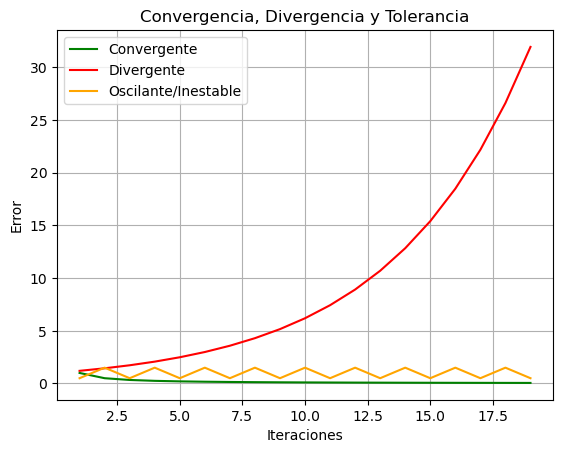

In [3]:
import matplotlib.pyplot as plt

# Valores del eje X (número de iteraciones)
iteraciones = list(range(1, 20))

# Tipos de errores
convergente = [1/i for i in iteraciones]
divergente = [1.2**i for i in iteraciones]
oscilante = [1 + 0.5*(-1)**i for i in iteraciones]

# Crear la gráfica
plt.plot(iteraciones, convergente, color='green', label='Convergente')
plt.plot(iteraciones, divergente, color='red', label='Divergente')
plt.plot(iteraciones, oscilante, color='orange', label='Oscilante/Inestable')

# Agregar etiquetas y título
plt.xlabel("Iteraciones")
plt.ylabel("Error")
plt.title("Convergencia, Divergencia y Tolerancia")

# Mostrar leyenda y gráfico
plt.legend()
plt.grid(True)
plt.show()

# Criterios de parada

Los criterios de parada se usan dentro de los algoritmos iterativos para evitar que se ejecuten infinitamente. Estos criterios ayudan a decidir **cuándo detenerse**, una vez que se ha alcanzado una solución suficientemente buena o cuando se han agotado los recursos disponibles.

### Tipos comunes de criterios:

- **Error absoluto:**  
  Se detiene si la diferencia entre dos iteraciones consecutivas es muy pequeña.  
  |pn - pn-1| < ε

- **Error relativo:**  
  Se compara el cambio relativo respecto al valor actual.  
  |pn - pn-1| / |pn| < ε

- **Valor de la función:**  
  Si el valor de la función en la solución es casi cero.  
  |f(pn)| < E

- **Número máximo de iteraciones:**  
  Para evitar bucles infinitos.  
  i < K

- **Tiempo máximo:**  
  Se detiene si el tiempo de ejecución supera un límite.  
  t < T[ms]


### Para este ejemplo :
#### Se usaran los siguientes criterios de parada:

- **Error absoluto:** Se detiene si |f(x)| < 0.01
- **Máximo de iteraciones:** Se detiene si pasa de 20 intentos


In [18]:
# Queremos encontrar la raíz de: f(x) = x - 3
def f(x):
    return x - 3

# Punto de partida
x = 0

# Parámetros de parada para la funcion 
tolerancia = 0.01
max_iteraciones = 20

for i in range(max_iteraciones):
    fx = f(x)
    error = abs(fx)
    
    print("Iteración:", i+1, "| x =", x, "| f(x) =", fx, "| Error =", error)
     # Criterios de parada
    if error < tolerancia:
        print("\n¡Paró porque el error es pequeño!")
        break
    # acercarse a la raíz (x = x + 0.5)
    x = x + 0.5
else:
    print("\n¡Paró por máximo de iteraciones!")


Iteración: 1 | x = 0 | f(x) = -3 | Error = 3
Iteración: 2 | x = 0.5 | f(x) = -2.5 | Error = 2.5
Iteración: 3 | x = 1.0 | f(x) = -2.0 | Error = 2.0
Iteración: 4 | x = 1.5 | f(x) = -1.5 | Error = 1.5
Iteración: 5 | x = 2.0 | f(x) = -1.0 | Error = 1.0
Iteración: 6 | x = 2.5 | f(x) = -0.5 | Error = 0.5
Iteración: 7 | x = 3.0 | f(x) = 0.0 | Error = 0.0

¡Paró porque el error es pequeño!
